In [1]:
import pandas as pd
import numpy as np
import os
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import seaborn as sns

os.chdir('C:/Users/39329/OneDrive - ISEG/000 Dissertation/Used Car/Code')

In [2]:
df_original = pd.read_csv("Dataset/vehicles.csv")

In [3]:
df = df_original.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

County has 0 non-null values. Let's proceed removing not columns certainly not relevant for the purpose of the exercise.

In [5]:
drop_columns = ['url','region_url','VIN','image_url','county']
df.drop(columns = drop_columns,inplace=True)

Let's drop all null values.

In [6]:
df.dropna(inplace=True)

In [7]:
df[df.duplicated()]

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,...,transmission,drive,size,type,paint_color,description,state,lat,long,posting_date


No duplicates

## EDA

### Location

Most of the cars are in the East part of the U.S.

### Price

In [8]:
df['price'].value_counts().iloc[:10]

0       3426
4500     996
3500     986
6500     932
5500     871
7500     840
1        830
2500     781
8500     726
6995     707
Name: price, dtype: int64

Remove rows where price is 0

In [9]:
df = df[df['price'] != 0]
df.reset_index(drop=True,inplace=True)

In [10]:
df.price.describe()

count    7.559000e+04
mean     8.319700e+04
std      1.420277e+07
min      1.000000e+00
25%      5.495000e+03
50%      9.800000e+03
75%      1.799500e+04
max      3.736929e+09
Name: price, dtype: float64

Max value is too big, must be incorrect.
Also, cars priced at 1 should be verified.

In [11]:
df[df['price'].isin(df['price'].nlargest(10))].loc[:,['price','manufacturer','model','cylinders','year']].sort_values(by='price',ascending = False)

,price,manufacturer,model,cylinders,year
57204,3736928711,toyota,tundra,8 cylinders,2007.0
4820,1111111111,ford,f350 super duty lariat,8 cylinders,1999.0
40592,135008900,nissan,titan se kingcab,8 cylinders,2008.0
23548,123456789,buick,regal,6 cylinders,1999.0
55755,123456789,gmc,sierra 2500,8 cylinders,1996.0
23342,17000000,ram,2500,8 cylinders,2007.0
11364,2000000,saturn,l-series l200 4dr sedan,4 cylinders,2002.0
26578,1234567,jeep,wrangler,6 cylinders,2006.0
38774,1111111,dodge,challenger,8 cylinders,1970.0
35392,195000,subaru,wrx,4 cylinders,2017.0


Top 10 posting by price are cleary incorrect and will be removed

In [12]:
df.drop(df['price'].nlargest(9).index,inplace = True)

In [13]:
df[df['price']<=100]

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,...,transmission,drive,size,type,paint_color,description,state,lat,long,posting_date
314,7302105553,birmingham,1,2005.0,gmc,envoy,excellent,8 cylinders,gas,181000.0,...,automatic,4wd,full-size,SUV,white,"Clean 2005 GMC Envoy $5,500 show contact info",al,33.505374,-86.852645,2021-04-05T11:16:20-0500
816,7316586926,anchorage / mat-su,1,2010.0,chevrolet,traverse lt awd,excellent,6 cylinders,gas,120000.0,...,automatic,4wd,mid-size,SUV,red,"2010 Chevy Traverse Parting out, Many Body par...",ak,61.154900,-149.886600,2021-05-03T19:48:55-0800
1027,7313963942,anchorage / mat-su,10,2011.0,volkswagen,gti,good,4 cylinders,gas,119000.0,...,manual,fwd,mid-size,hatchback,custom,Up for sale is a 2011 Vw GTI. It’s got a 6spd ...,ak,61.592300,-149.395900,2021-04-28T10:49:04-0800
1091,7312230496,anchorage / mat-su,1,2010.0,chevrolet,traverse lt awd,excellent,6 cylinders,gas,120000.0,...,automatic,4wd,mid-size,SUV,red,"2010 Chevy Traverse Parting out, Many Body par...",ak,61.154900,-149.886600,2021-04-24T21:52:24-0800
1488,7313988885,flagstaff / sedona,1,1955.0,ford,f-100,fair,6 cylinders,gas,70000.0,...,manual,rwd,full-size,truck,blue,1955 Ford F-100 all original 70k miles Radio...,az,35.154500,-111.678900,2021-04-28T12:31:33-0700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72921,7315362197,eastern panhandle,1,1992.0,ford,ranger,good,4 cylinders,gas,77666.0,...,manual,rwd,compact,pickup,red,SORRY.,wv,39.475094,-77.870686,2021-05-01T12:54:08-0400
73958,7313630065,la crosse,1,1967.0,chevrolet,impala,fair,8 cylinders,gas,95000.0,...,automatic,rwd,full-size,coupe,white,1967 Chevy Impala Super Sport 2 door coupe 327...,wi,44.153982,-91.744251,2021-04-27T19:22:00-0500
74280,7312544166,madison,15,2018.0,chevrolet,equinox lt,excellent,4 cylinders,gas,72323.0,...,automatic,fwd,compact,SUV,white,Selling my 2018 Chevy equinox LT FWD with pus...,wi,43.163600,-89.075300,2021-04-25T16:55:17-0500
74669,7316932276,milwaukee,1,2020.0,mercedes-benz,porsche. bmw. ect.,new,other,other,1.0,...,other,rwd,mid-size,other,custom,Professional import auto service. Specializing...,wi,43.050000,-88.397200,2021-05-04T15:44:30-0500


In [14]:
df.drop(df[df['price']<=100].index, inplace = True)

Postings with price under 100$ will be removed

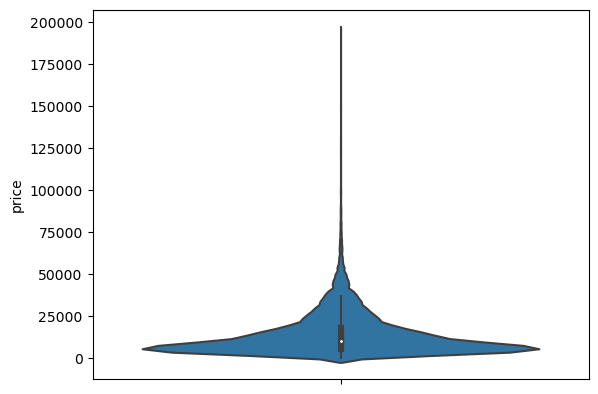

In [15]:
sns.violinplot(y='price', data=df);

### Title Status

In [16]:
df['title_status'].value_counts()

clean         69878
rebuilt        2652
salvage        1113
lien            679
missing         167
parts only       40
Name: title_status, dtype: int64

Kept only 'clean' postings

In [17]:
df = df[df['title_status'] == 'clean']
df.drop('title_status', axis=1, inplace=True)

### Year

<Axes: xlabel='year', ylabel='Count'>

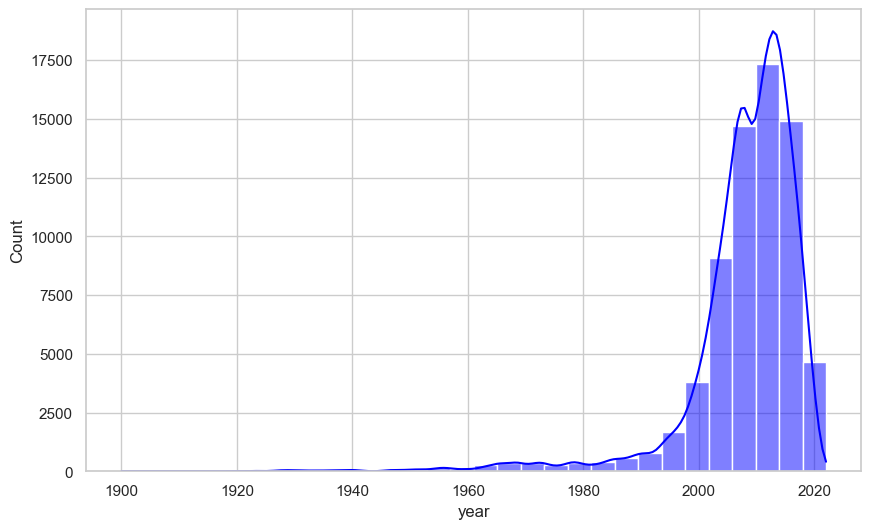

In [18]:
sns.set(style='whitegrid')

plt.figure(figsize=(10, 6))  
sns.histplot(df['year'], kde=True, bins=30, color='blue')

In [21]:
df = df[(df['year'] >= 1990) & (df['year']<2021)]

Reduce postings to years 1991 to 2020 (30 years)

In [22]:
df['year'].value_counts().nlargest(10)

2013.0    4996
2014.0    4461
2012.0    4449
2011.0    4297
2008.0    4290
2015.0    4113
2007.0    3896
2010.0    3584
2006.0    3432
2016.0    3359
Name: year, dtype: int64

Peak of car postings for years bewteen 2011 and 2014

### Manufacturers

In [24]:
df['manufacturer'].value_counts()

ford               13275
chevrolet           9611
toyota              6095
honda               4217
nissan              3367
gmc                 2723
jeep                2675
ram                 2421
dodge               1985
bmw                 1884
subaru              1665
hyundai             1574
mercedes-benz       1516
volkswagen          1481
kia                 1229
chrysler            1178
lexus               1103
cadillac             977
mazda                870
buick                861
audi                 812
acura                617
mitsubishi           552
volvo                547
lincoln              542
pontiac              542
infiniti             529
mini                 389
saturn               328
mercury              310
rover                281
porsche              216
jaguar               168
fiat                 105
harley-davidson       25
tesla                 25
alfa-romeo            19
ferrari               10
land rover             7
aston-martin           5
